<a href="https://colab.research.google.com/github/SaraKarim23/GFPGAN_inference/blob/main/GFPGAN_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GFPGAN Inference Demo 

GFPGAN is a blind face restoration algorithm towards real-world face images. <br>

**GFPGAN - Towards Real-World Blind Face Restoration with Generative Facial Prior**

# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.


In [1]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
!wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models

/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 340 (delta 100), reused 148 (delta 52), pack-reused 135
Receiving objects: 100% (340/340), 5.29 MiB | 16.46 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/GFPGAN
     |████████████████████████████████| 1.2 MB 13.2 MB/s 
     |████████████████████████████████| 5.8 MB 44.7 MB/s 
     |████████████████████████████████| 185 kB 48.2 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.8-py3-none-any.whl size=506787 sha256=b60f7d9be9af5055ff37e3cda61ce3beae64e07c95517cbd71cde50f2092c54d
  Stored in directory: /root/.cache/pip/wheels/10/30/2d/19e513b6b0397ea4cf572959b4c0e76cdd167dd1ca6d1bcd8a
Successfully built basicsr
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 177 kB 23.6 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-n

# 2. Upload Images / Use the demo images

In [7]:
# upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving confuse meme.jpg to confuse meme.jpg
move confuse meme.jpg to inputs/upload/confuse meme.jpg


### OR you can use the demo image by running the following codes

In [8]:
import shutil
import os
upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.makedirs(upload_folder, exist_ok=True)
shutil.move('inputs/whole_imgs/confuse meme.jpg', 'inputs/upload/confuse meme.jpg')

'inputs/upload/confuse meme.jpg'

## 3. Inference

In [9]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
!rm -rf results
!python inference_gfpgan.py --upscale 2 --test_path inputs/upload --save_root results --model_path experiments/pretrained_models/GFPGANCleanv1-NoCE-C2.pth --bg_upsampler realesrgan

!ls results/cmp

Processing confuse meme.jpg ...
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Results are in the [results] folder.
'confuse meme_00.png'  'confuse meme_01.png'


## 4. Visualize

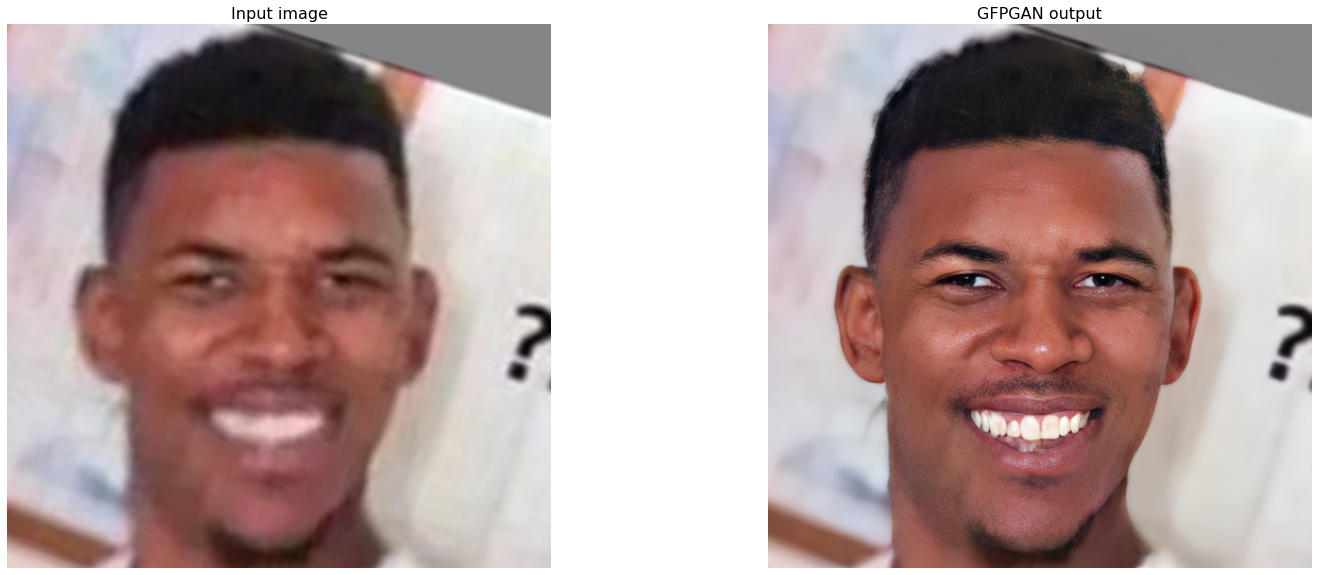

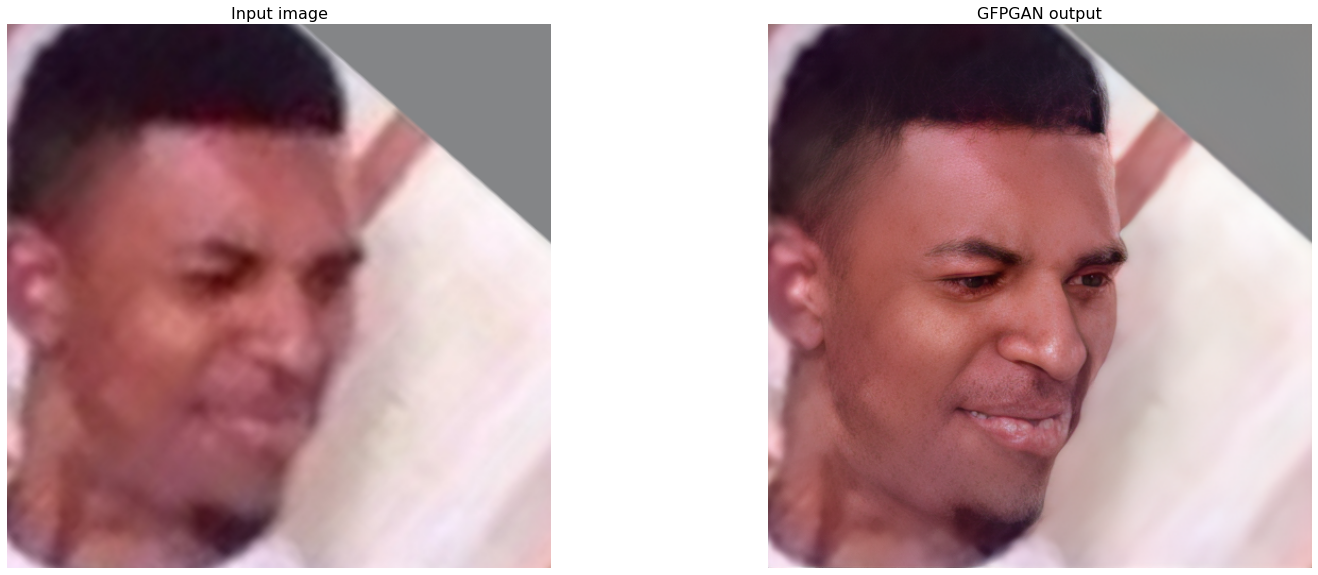

In [10]:
# We first visualize the cropped faces
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)


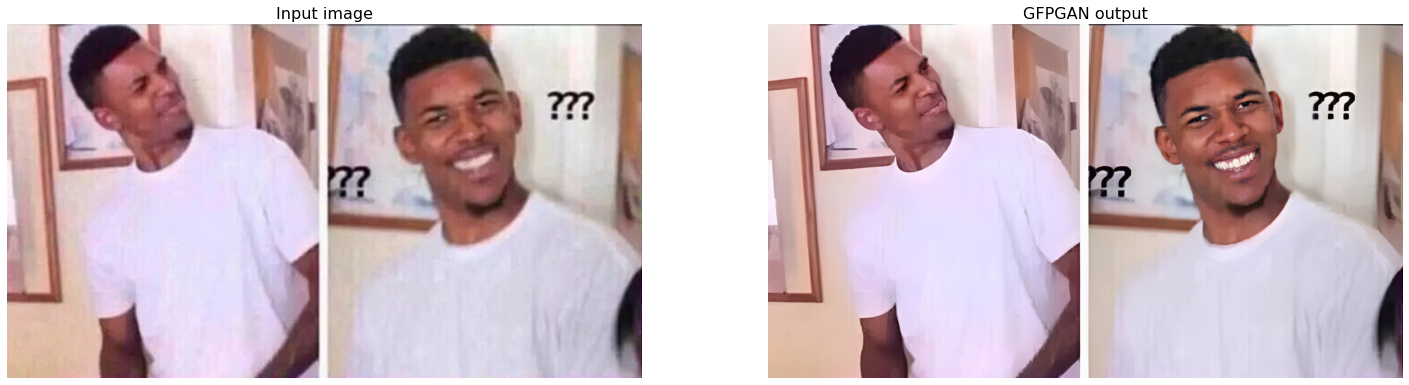

In [11]:
# We then visualize the whole image
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'inputs/upload'
result_folder = 'results/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

## 5. Download results

In [12]:
# download the result
!ls results
print('Download results')
os.system('zip -r download.zip results')
files.download("download.zip")

cmp  cropped_faces  restored_faces  restored_imgs
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>